_______________
# 06. Data Analysis & Visualisation (Kaggle Example)
_______________

The following commands can be used (with minor adjustments, of course) to download/unzip some kaggle dataset without leaving the jupyter interpreter. However, you would first have to install a kaggle-specific library within you conda environment to do so. In the present case, this has been simplified for you, the data has been downloaded and stored within the `data` directory:

    data/athlete_events.csv
    data/noc_regions.csv


In [7]:
# !kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

In [8]:
# !unzip -qq 120-years-of-olympic-history-athletes-and-results.zip -d ./data

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
os.listdir('data')

['test_images_partB.csv',
 'train_auto_full.csv',
 'credit.csv',
 'train_images_partA.csv',
 'kyphosis.csv',
 'splice_test.csv',
 'valid_images_partB.csv',
 'noc_regions.csv',
 'spambase_test.csv',
 'splice_train.csv',
 'cpu.csv',
 'advertising.csv',
 'train_auto_numeric.csv',
 'train_20news_partB.csv',
 'spambase.csv',
 'train_images_partB.csv',
 'spambase_binary.csv',
 'athlete_events.csv',
 'train_auto_base.csv',
 'train_20news_partA.csv',
 'landsat.csv',
 'valid_images_partA.csv',
 'USA_Housing.csv']

# Importing data

In [19]:
data = pd.read_csv('./data/athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [20]:
regions = pd.read_csv('./data/noc_regions.csv')
regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


# Main information about the data

In [13]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [15]:
data.head(3).T

,0,1,2
ID,1,2,3
Name,A Dijiang,A Lamusi,Gunnar Nielsen Aaby
Sex,M,M,M
Age,24,23,24
Height,180,170,NaN
Weight,80,60,NaN
Team,China,China,Denmark
NOC,CHN,CHN,DEN
Games,1992 Summer,2012 Summer,1920 Summer
Year,1992,2012,1920


In [16]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [18]:
df = pd.merge(data, regions, on='NOC', how='left')

In [21]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Name,A Dijiang,A Lamusi,Gunnar Nielsen Aaby,Edgar Lindenau Aabye,Christine Jacoba Aaftink
Sex,M,M,M,M,F
Age,24,23,24,34,21
Height,180,170,NaN,NaN,185
Weight,80,60,NaN,NaN,82
Team,China,China,Denmark,Denmark/Sweden,Netherlands
NOC,CHN,CHN,DEN,DEN,NED
Games,1992 Summer,2012 Summer,1920 Summer,1900 Summer,1988 Winter
Year,1992,2012,1920,1900,1988


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


# Distribution of the age of gold medalists

In [24]:
# these are alternatives in this case
gold_medals = df[df.Medal == 'Gold']
gold_medals = df.loc[df.Medal == 'Gold']

In [29]:
gold_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NaN
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,Norway,NaN


In [28]:
gold_medals.isnull().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

In [33]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]
gold_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NaN
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,Norway,NaN


Text(0.5,1,'Distribution of Gold Medals')

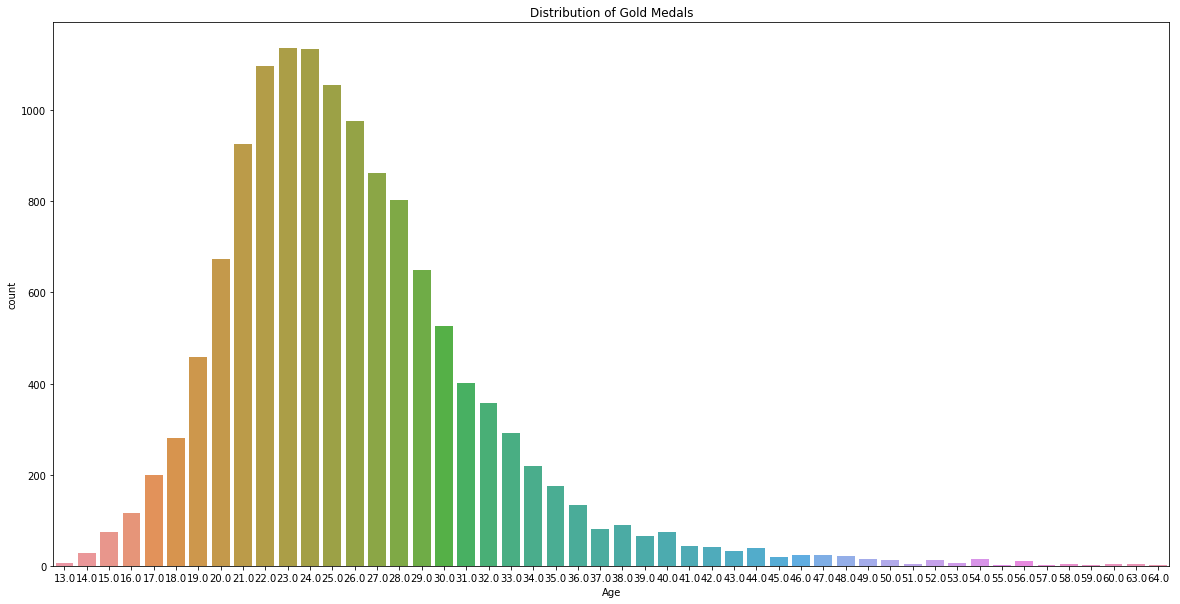

In [34]:
plt.figure(figsize=(20, 10))
# plt.tight_layout()
sns.countplot(gold_medals['Age'])
plt.title('Distribution of Gold Medals')

In [35]:
gold_medals['ID'][gold_medals['Age'] > 50].count()

65

In [36]:
gold_medals[gold_medals['Age'] < 15].Sport.value_counts()

Swimming                     14
Rowing                        7
Gymnastics                    7
Diving                        3
Short Track Speed Skating     2
Sailing                       1
Name: Sport, dtype: int64

Text(0.5,1,'Gold medals for over 50')

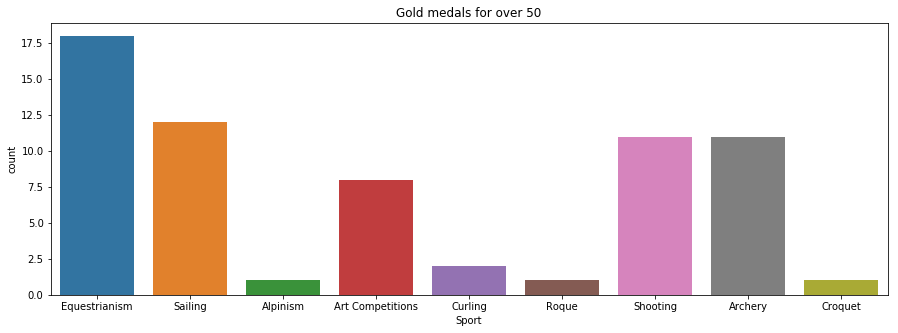

In [38]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
sns.countplot(gold_medals['Sport'][gold_medals['Age'] > 50])
plt.title('Gold medals for over 50')

In [39]:
women_in_olympics = df[(df.Sex == 'F') & (df.Season == 'Summer')]

In [40]:
women_in_olympics.sample(4).T

,130887,122291,248598,188782
ID,65887,61817,124451,94837
Name,Elena Wilma Lagorara,Vera Minna Chantelle Kock,Yolande Van Der Straeten,Emilia Pikkarainen (-Bottas)
Sex,F,F,F,F
Age,21,16,14,19
Height,158,168,177,173
Weight,54,52,69,54
Team,Italy,Sweden,Belgium,Finland
NOC,ITA,SWE,BEL,FIN
Games,1960 Summer,1968 Summer,1980 Summer,2012 Summer
Year,1960,1968,1980,2012


Text(0.5,1,'Women participations per year')

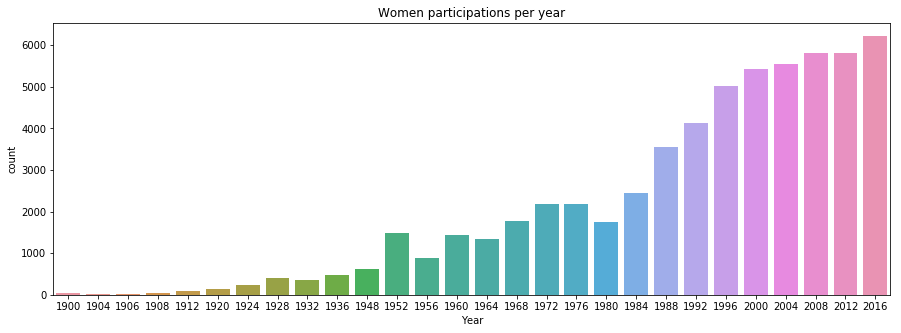

In [41]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Year', data=women_in_olympics)
plt.title('Women participations per year')

In [42]:
women_in_olympics.loc[women_in_olympics['Year'] == 1900]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


# Medals per country

In [49]:
total_recent_gold_medals = (gold_medals[gold_medals.Year > 1990]
    .region
    .value_counts()
    .reset_index(name="Medals")
    .head(10))

Text(0.5,1,'Medals per country')

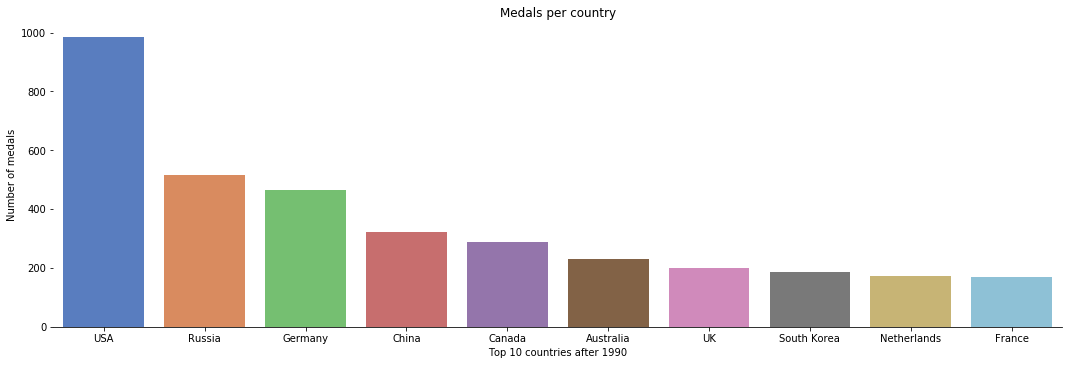

In [50]:
g = sns.catplot(x='index', y='Medals', data=total_recent_gold_medals, kind='bar', palette='muted', aspect=3)
g.despine(left=True)
g.set_xlabels('Top 10 countries after 1990')
g.set_ylabels('Number of medals')
plt.title('Medals per country')